In [1]:
!pip install -U libsvm-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.31.0-cp310-cp310-linux_x86_64.whl size=125903 sha256=f135db10782e5230cefbf98cc0d912821ce3127810588b45b433474f1433b59e
  Stored in directory: /root/.cache/pip/wheels/93/04/ec/306a03478d811cf83c10665ca5e60231f47360a367e06d94d0
Successfully built libsvm-official


In [2]:
!pip install -U liblinear-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for liblinear-official: filename=liblinear_official-2.46.1-cp310-cp310-linux_x86_64.whl size=146573 sha256=f82dc38de07b6966a965f7c47276934d6238ea982085cd43c2ca21ac262cdee1
  Stored in directory: /root/.cache/pip/wheels/d1/c4/f5/0f9664e5a5484cfe73e265aaa8eb83d8d51342760c979cb846
Successfully built liblinear-official


In [3]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np
from liblinear.liblinearutil import train, predict, problem
from libsvm.svmutil import *
from sklearn.model_selection import train_test_split

In [4]:
total_data=pd.read_csv("covtype.data",header=None)

In [5]:
total_data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [6]:
print(total_data.loc[:,54].unique())

[5 2 1 7 3 6 4]


In [30]:
def extract_data_as_per_index_files(file,data, rows):
    index=pd.read_csv(file,header=None)
    #print(index)
    index[0] = index[0]-1
    indices=index[0].values
    #print('indices:')
    #print(indices)
    #indices=sorted(indices)
    indices_list=[x for x in indices if x < rows]
    #print('indices list:')
    #print(indices_list)
    ret_data=data.iloc[indices_list]
    #print(ret_data)
    return ret_data

In [31]:
print(total_data.shape)
train_data=extract_data_as_per_index_files("covtype.train.index.txt",total_data, total_data.shape[0])
test_data=extract_data_as_per_index_files("covtype.test.index.txt",total_data, total_data.shape[0])


(581012, 55)


# **RAW DATA**

In [32]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
print(X_train.shape)
print(y_train.shape)
#taking class 2 as +ve, rest as -ve as per question
y_train = np.where(y_train == 2, 1, 0)
print(np.unique(y_train))

(522911, 54)
(522911,)
[0 1]


In [10]:
C_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
Cross_Validation_error=[]
for c in C_list:
    print(f"Training C={c}")
    params = f"-c {c} -s 3 -v 5"
    Cross_Validation_error.append(train(y_train.ravel(), X_train, params))
    print()

Training C=0.1
Cross Validation Accuracy = 51.1054%

Training C=1.0
Cross Validation Accuracy = 54.6005%

Training C=10.0
Cross Validation Accuracy = 52.3156%

Training C=100.0
Cross Validation Accuracy = 54.3989%

Training C=1000.0
Cross Validation Accuracy = 54.8952%



In [11]:
Cross_Validation_error

[51.105446242285964,
 54.60049606912075,
 52.31559481441393,
 54.39893213185418,
 54.895192489735344]

In [33]:
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
print("Best Accuracy = ",max(Cross_Validation_error), "%")
best_c_val=C_list[Cross_Validation_error.index(max(Cross_Validation_error))]
print("Best C value = ",best_c_val)


Best Accuracy =  54.895192489735344 %
Best C value =  1000.0


In [34]:
model = train(y_train.ravel(), X_train, f'-c {best_c_val} -s 3')

In [35]:
y_test = np.where(y_test == 2, 1, 0)

In [36]:
y_test.ravel()

array([0, 1, 0, ..., 0, 0, 0])

In [37]:
y_pred_raw, _, _ = predict(y_test.ravel(), X_test.values, model)

Accuracy = 52.364% (30424/58101) (classification)


In [38]:
print(np.unique(y_pred_raw))

[0. 1.]


In [39]:
#taking class 2 as +ve, rest as -ve as per question

from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score


accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(accuracy_raw,"Accuracy of Raw Data= {:.5f}".format(accuracy_raw))
f1_raw = f1_score(y_test, y_pred_raw)
auc_raw = roc_auc_score(y_test, y_pred_raw)

print(f1_raw,"F1-score on testing data for Raw Data: {:.2f}".format(f1_raw))
print(auc_raw,"AUC on testing data for Raw Data: {:.2f}".format(auc_raw))
fpr_raw, tpr_raw, _ = roc_curve(y_test,y_pred_raw)

0.523639868504845 Accuracy of Raw Data= 0.52364
0.6681375076439765 F1-score on testing data for Raw Data: 0.67
0.536429727539848 AUC on testing data for Raw Data: 0.54


# **RESCALE PREPROCESSING**

In [40]:
from sklearn.preprocessing import MinMaxScaler
total_rescale_preprocessed = total_data.iloc[:, :-1]
scaler = MinMaxScaler()
scaler.fit(total_rescale_preprocessed)
total_rescale_preprocessed = scaler.transform(total_rescale_preprocessed)
print(total_rescale_preprocessed)

df_concat_rescaled = pd.concat([pd.DataFrame(total_rescale_preprocessed), total_data.iloc[:, -1]], axis=1)
print(df_concat_rescaled)
train_data=extract_data_as_per_index_files("covtype.train.index.txt",df_concat_rescaled, df_concat_rescaled.shape[0])
test_data=extract_data_as_per_index_files("covtype.test.index.txt",df_concat_rescaled, df_concat_rescaled.shape[0])


X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:, -1]
#taking class 2 as +ve, rest as -ve as per question
y_train = np.where(y_train == 2, 1, 0)
print(np.unique(y_train))

print(X_train.shape)
print(y_train.shape)



[[0.36868434 0.14166667 0.04545455 ... 0.         0.         0.        ]
 [0.36568284 0.15555556 0.03030303 ... 0.         0.         0.        ]
 [0.47273637 0.38611111 0.13636364 ... 0.         0.         0.        ]
 ...
 [0.26363182 0.44166667 0.25757576 ... 0.         0.         0.        ]
 [0.26263132 0.47222222 0.22727273 ... 0.         0.         0.        ]
 [0.26213107 0.45833333 0.1969697  ... 0.         0.         0.        ]]
              0         1         2         3         4         5         6   \
0       0.368684  0.141667  0.045455  0.184681  0.223514  0.071659  0.870079   
1       0.365683  0.155556  0.030303  0.151754  0.215762  0.054798  0.866142   
2       0.472736  0.386111  0.136364  0.191840  0.307494  0.446817  0.921260   
3       0.463232  0.430556  0.272727  0.173228  0.375969  0.434172  0.937008   
4       0.368184  0.125000  0.030303  0.109520  0.222222  0.054939  0.866142   
...          ...       ...       ...       ...       ...       ...       ...

In [41]:
C_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
Cross_Validation_acc=[]
for c in C_list:
    print(f"Training C={c}")
    params = f"-c {c} -s 3 -v 5"
    Cross_Validation_acc.append(train(y_train.ravel(), X_train.values, params))
    print()

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
print("Best Accuracy = ",max(Cross_Validation_acc), "%")
best_c_val=C_list[Cross_Validation_acc.index(max(Cross_Validation_acc))]
print("Best C value = ",best_c_val)

Training C=0.1
Cross Validation Accuracy = 76.2952%

Training C=1.0
Cross Validation Accuracy = 76.3002%

Training C=10.0
Cross Validation Accuracy = 76.2937%

Training C=100.0
Cross Validation Accuracy = 67.0831%

Training C=1000.0
Cross Validation Accuracy = 59.5277%

Best Accuracy =  76.30017345207885 %
Best C value =  1.0


In [42]:
print("testing:")
y_test = np.where(y_test == 2, 1, 0)
model = train(y_train.ravel(), X_train.values, f'-c {best_c_val} -s 3')
y_pred_rescaled, _, _ = predict(y_test.ravel(), X_test.values, model)

testing:
Accuracy = 76.5667% (44486/58101) (classification)


In [43]:

from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

accuracy_rescaled = accuracy_score(y_test, y_pred_rescaled)
print(accuracy_rescaled,"Accuracy of Rescaled Preprocessing= {:.5f}".format(accuracy_rescaled))
f1_rescaled = f1_score(y_test, y_pred_rescaled)
auc_rescaled = roc_auc_score(y_test, y_pred_rescaled)

print(f1_rescaled,"F1-score on testing data for Rescaled Preprocessing: {:.2f}".format(f1_rescaled))
print(auc_rescaled,"AUC on testing data for Rescaled Preprocessing: {:.2f}".format(auc_rescaled))
fpr_rescaled, tpr_rescaled, _ = roc_curve(y_test,y_pred_rescaled)

0.7656666838780744 Accuracy of Rescaled Preprocessing= 0.76567
0.7642546707530344 F1-score on testing data for Rescaled Preprocessing: 0.76
0.7661138070570266 AUC on testing data for Rescaled Preprocessing: 0.77


# **Standardization Preprocessing**

In [44]:
from sklearn.preprocessing import StandardScaler
total_std_preprocessed = total_data.iloc[:, :-1]
standar_scaler = StandardScaler()
standar_scaler.fit(total_std_preprocessed)
total_std_preprocessed = standar_scaler.transform(total_std_preprocessed)
print(total_std_preprocessed)

df_concat_std = pd.concat([pd.DataFrame(total_std_preprocessed), total_data.iloc[:, -1]], axis=1)
print(df_concat_std)
train_data=extract_data_as_per_index_files("covtype.train.index.txt",df_concat_std, df_concat_std.shape[0])
test_data=extract_data_as_per_index_files("covtype.test.index.txt",df_concat_std, df_concat_std.shape[0])

X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:, -1]
#taking class 2 as +ve, rest as -ve as per question
y_train = np.where(y_train == 2, 1, 0)
print(np.unique(y_train))

print(X_train.shape)
print(y_train.shape)



[[-1.29780509 -0.93515698 -1.48281978 ... -0.16595612 -0.15601398
  -0.12365355]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.16595612 -0.15601398
  -0.12365355]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.16595612 -0.15601398
  -0.12365355]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05498988  0.12816306  0.11969395 ... -0.16595612 -0.15601398
  -0.12365355]
 [-2.05856151  0.08348575 -0.14739167 ... -0.16595612 -0.15601398
  -0.12365355]]
              0         1         2         3         4         5         6   \
0      -1.297805 -0.935157 -1.482820 -0.053767 -0.796273 -1.180146  0.330743   
1      -1.319235 -0.890480 -1.616363 -0.270188 -0.899197 -1.257106  0.293388   
2      -0.554907 -0.148836 -0.681563 -0.006719  0.318742  0.532212  0.816364   
3      -0.622768 -0.005869  0.520322 -0.129044  1.227908  0.474492  0.965786   
4      -1.301377 -0.988770 -1.616363 -0.547771 -0.813427 -1.256464  0.293388   
...          ...       ...  

In [45]:
C_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
Cross_Validation_error=[]
for c in C_list:
    print(f"Training C={c}")
    params = f"-c {c} -s 3 -v 5"
    Cross_Validation_error.append(train(y_train.ravel(), X_train.values, params))
    print()

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
print("Best Accuracy = ",max(Cross_Validation_error), "%")
best_c_val=C_list[Cross_Validation_error.index(max(Cross_Validation_error))]
print("Best C value = ",best_c_val)

print("testing:")
#taking class 2 as +ve, rest as -ve as per question
y_test = np.where(y_test == 2, 1, 0)

model = train(y_train.ravel(), X_train.values, f'-c {best_c_val} -s 3')
y_pred_std, _, _ = predict(y_test.ravel(), X_test.values, model)

Training C=0.1
Cross Validation Accuracy = 76.3277%

Training C=1.0
Cross Validation Accuracy = 76.2577%

Training C=10.0
Cross Validation Accuracy = 73.158%

Training C=100.0
Cross Validation Accuracy = 64.2578%

Training C=1000.0
Cross Validation Accuracy = 66.7058%

Best Accuracy =  76.32771159910577 %
Best C value =  0.1
testing:
Accuracy = 76.5219% (44460/58101) (classification)


In [46]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

accuracy_std = accuracy_score(y_test, y_pred_std)
print(accuracy_std,"Accuracy of Rescaled Preprocessing= {:.5f}".format(accuracy_std))
f1_std = f1_score(y_test, y_pred_std)
auc_std = roc_auc_score(y_test, y_pred_std)

print(f1_std,"F1-score on testing data for Rescaled Preprocessing: {:.2f}".format(f1_std))
print(auc_std,"AUC on testing data for Rescaled Preprocessing: {:.2f}".format(auc_std))
fpr_std, tpr_std, _ = roc_curve(y_test,y_pred_std)

0.7652191872773274 Accuracy of Rescaled Preprocessing= 0.76522
0.765154514935009 F1-score on testing data for Rescaled Preprocessing: 0.77
0.7658282582870418 AUC on testing data for Rescaled Preprocessing: 0.77


# **Normalization Preprocessing**

In [47]:
from sklearn.preprocessing import Normalizer
total_norm_preprocessed = total_data.iloc[:, :-1]
# create a Normalizer object
normalizer = Normalizer()
# normalize the data
total_norm_preprocessed = normalizer.fit_transform(total_norm_preprocessed)
print(total_norm_preprocessed)

df_concat_norm = pd.concat([pd.DataFrame(total_norm_preprocessed), total_data.iloc[:, -1]], axis=1)
print(df_concat_norm)
train_data=extract_data_as_per_index_files("covtype.train.index.txt",df_concat_norm, df_concat_norm.shape[0])
test_data=extract_data_as_per_index_files("covtype.test.index.txt",df_concat_norm, df_concat_norm.shape[0])

X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:, -1]
#taking class 2 as +ve, rest as -ve as per question
y_train = np.where(y_train == 2, 1, 0)
print(np.unique(y_train))

print(X_train.shape)
print(y_train.shape)



[[3.80210116e-01 7.46945914e-03 4.39379949e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.82768672e-01 8.27607940e-03 2.95574264e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.75820888e-01 1.86302081e-02 1.20627247e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.29431778e-01 6.19361495e-02 6.62210404e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.27677164e-01 6.61514756e-02 5.83689491e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.26697830e-01 6.41649777e-02 5.05542249e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
              0         1         2         3         4         5         6   \
0       0.380210  0.007469  0.000439  0.037787  0.000000  0.074695  0.032368   
1       0.382769  0.008276  0.000296  0.031331 -0.000887  0.057637  0.032513   
2       0.375821  0.018630  0.001206  0.035920  0.008712  0.426216  0.031363   
3       0.371810  0.020693  0.002403  0.032308  0.015754  0.412529  0.031774   


In [48]:
C_list = [0.1, 1.0, 10.0, 100.0, 1000.0]
Cross_Validation_acc=[]
for c in C_list:
    print(f"Training C={c}")
    params = f"-c {c} -s 3 -v 5"
    Cross_Validation_acc.append(train(y_train.ravel(), X_train.values, params))
    print()

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
print("Best Accuracy = ",max(Cross_Validation_acc), "%")
best_c_val=C_list[Cross_Validation_acc.index(max(Cross_Validation_acc))]
print("Best C value = ",best_c_val)

print("testing:")
y_test = np.where(y_test == 2, 1, 0)
model = train(y_train.ravel(), X_train.values, f'-c {best_c_val} -s 3')
y_pred_norm, _, _ = predict(y_test.ravel(), X_test.values, model)


Training C=0.1
Cross Validation Accuracy = 58.7884%

Training C=1.0
Cross Validation Accuracy = 59.2344%

Training C=10.0
Cross Validation Accuracy = 59.8392%

Training C=100.0
Cross Validation Accuracy = 61.4112%

Training C=1000.0
Cross Validation Accuracy = 56.196%

Best Accuracy =  61.41121529285098 %
Best C value =  100.0
testing:
Accuracy = 61.4224% (35687/58101) (classification)


In [49]:

from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import accuracy_score

accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(accuracy_norm,"Accuracy of Rescaled Preprocessing= {:.5f}".format(accuracy_norm))
f1_norm = f1_score(y_test, y_pred_std)
auc_norm = roc_auc_score(y_test, y_pred_norm)

print(f1_norm,"F1-score on testing data for Rescaled Preprocessing: {:.2f}".format(f1_norm))
print(auc_norm,"AUC on testing data for Rescaled Preprocessing: {:.2f}".format(auc_norm))
fpr_norm, tpr_norm, _ = roc_curve(y_test,y_pred_norm)

0.6142235073406654 Accuracy of Rescaled Preprocessing= 0.61422
0.765154514935009 F1-score on testing data for Rescaled Preprocessing: 0.77
0.6159364762658364 AUC on testing data for Rescaled Preprocessing: 0.62


# **TABLE FOR COMPARISON**

In [50]:
print('PreProcessing|Test Accuracy|Test F1-score| Test AUC ')
print('--------------------------------------------------------------------------------------------------------------------')
print()
print('Raw          |    {:.5f}   |   {:.5f}    | {:.5f} '.format(accuracy_raw, f1_raw, auc_raw))
print('Rescaled     |    {:.5f}   |   {:.5f}    | {:.5f} '.format(accuracy_rescaled, f1_rescaled, auc_rescaled))
print('Standardized |    {:.5f}   |   {:.5f}    | {:.5f} '.format(accuracy_std, f1_std, auc_std))
print('Normalized   |    {:.5f}   |   {:.5f}    | {:.5f} '.format(accuracy_norm, f1_norm, auc_norm))

PreProcessing|Test Accuracy|Test F1-score| Test AUC 
--------------------------------------------------------------------------------------------------------------------

Raw          |    0.52364   |   0.66814    | 0.53643 
Rescaled     |    0.76567   |   0.76425    | 0.76611 
Standardized |    0.76522   |   0.76515    | 0.76583 
Normalized   |    0.61422   |   0.76515    | 0.61594 


# **ROC PLOT**

In [51]:
raw_label=('ROC Curve Raw='+str(auc_raw))
std_label=('ROC Curve std='+str(auc_std))
rescaled_label=('ROC Curve Rescaled='+str(auc_rescaled))
norm_label=('ROC Curve Norm='+str(auc_norm))


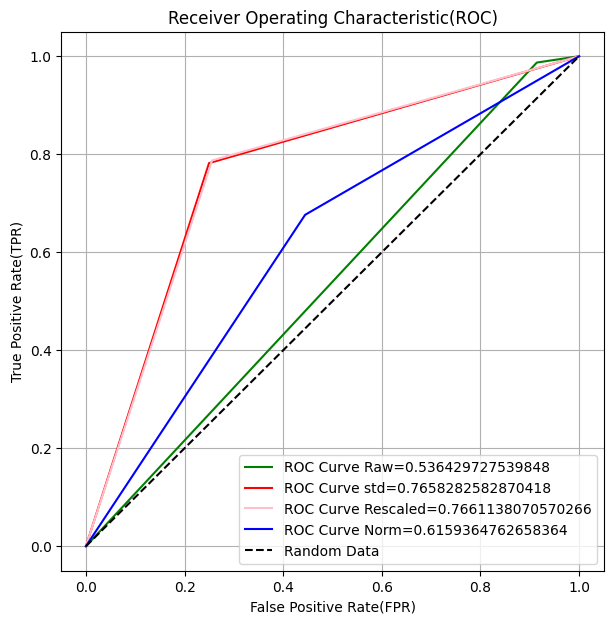

In [52]:
fig = plt.figure(figsize=(7, 7))
plt.plot(fpr_raw, tpr_raw, label=raw_label, color='green')
plt.plot(fpr_rescaled, tpr_rescaled, label=std_label, color='red')
plt.plot(fpr_std, tpr_std, label=rescaled_label, color='pink')
plt.plot(fpr_norm, tpr_norm, label=norm_label, color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Data')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

# **INTERPRETATION OF ROC CURVE:**

1. Performance of RAW data in green is the worst because for same TPR, it has highest FPR and is closest to the Random data identifier line (represented in black dashed)
2. Performance of Rescaled data and Standard Scaled data is almost same here. Both have been scaled between 0 and 1. However, the fact that they are same indicates that the data exhibits mean 0 and Std Dev 1,
3. Normalized Data falls between these curves.

# ***OBSERVATION ANALYSIS:***

Preprocessing is an important step in machine learning that involves transforming the raw data into a format that can be used by the learning algorithm. **As per question, I have used several techniques available for preprocessing the data, including raw data, rescaling, standard scaling, and normalization**. Each technique has its own advantages and disadvantages, and the choice of technique depends on the nature of the data and the learning algorithm being used.

**Raw data**: Raw data is the original, unprocessed data. This can be used directly by some machine learning algorithms, such as decision trees, but other algorithms may require preprocessing to improve their performance.

**Rescaling**: Rescaling involves **transforming the data so that it falls within a specified range**. This can be useful for features that have different scales, which can affect the performance of some learning algorithms. For example, some algorithms, such as K-nearest neighbors, use distance measures between data points, and features with larger scales can dominate the distance calculations. Rescaling can help to mitigate this effect. **I have used the min-max scaling, which scales the data to a range between 0 and 1.**

**Standard scaling**: Standard scaling involves **transforming the data so that it has a mean of 0 and a standard deviation of 1**. This can be useful for features that have different means and variances. Standard scaling is often used in linear models, such as linear regression and logistic regression, because it can improve the convergence of the optimization algorithm.

**Normalization**: The Normalizer class does not compute mean and variance. Instead, **it scales each row (sample) by its norm. This makes the length (norm) of each row equal to 1.0, and can be interpreted as normalizing the "shape" of the row vectors rather than scaling their "size"**.By doing so, the Normalizer class can be useful in situations where the magnitude of the features does not matter, but their direction (angle) does.

In summary, the choice of preprocessing technique depends on the nature of the data and the learning algorithm being used. Rescaling can be useful when features have different scales, standard scaling can be useful in linear models, and normalization can be useful for skewed/direction-oriented distributions. However, it is important to be careful when preprocessing the data, as some techniques can introduce bias or distort the relationships between features. It is also important to evaluate the performance of the learning algorithm using Cross Validation to ensure that the preprocessing technique is not overfitting the data.





